# Embodied cognition on Wikipedia: a data analysis
In what follows, an analysis of the page edits and views count for the _"Embodied cogtnition"_ article on Wikipedia is done. The data is provided by the WikipediaStatistics at [en.wikipedia.org](https://pageviews.wmcloud.org/?project=en.wikipedia.org&platform=all-access&agent=all-agents&redirects=1&start=2015-07-01&end=2022-05-31&pages=Embodied_cognition) and [xtools](https://xtools.wmflabs.org/articleinfo/en.wikipedia.org/Embodied_cognition#year-counts)

### Load data

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})
import seaborn as sns
import dataframe_image as dfi
import numpy as np
import datetime
from datetime import datetime

df_views_count_month = pd.read_csv('Data/ec-pageviews-20191201-20220531.csv', delimiter=",", header=0, index_col=False)
df_views_count_all = pd.read_csv('Data/ec-pageviews-20150701-20220531.csv', delimiter=',', header=0, index_col=False)

df_edits_count = pd.read_csv('Data/wiki_ec_edits_count2.csv', delimiter=",", header=0, index_col=False)

df_views_count_all

,Date,Embodied cognition
0,2015-07-01,265
1,2015-07-02,288
2,2015-07-03,211
3,2015-07-04,207
4,2015-07-05,234
...,...,...
2522,2022-05-27,427
2523,2022-05-28,435
2524,2022-05-29,478
2525,2022-05-30,494


In [6]:
# Converting date to a datestamp type
df_views_count_all["Date"] = pd.to_datetime(df_views_count_all["Date"])
df_edits_count["DateTime"] = pd.to_datetime(df_edits_count["DateTime"])
df_views_count_all

,Date,Embodied cognition
0,2015-07-01,265
1,2015-07-02,288
2,2015-07-03,211
3,2015-07-04,207
4,2015-07-05,234
...,...,...
2522,2022-05-27,427
2523,2022-05-28,435
2524,2022-05-29,478
2525,2022-05-30,494


### 1. Data  preprocessing

In [7]:
# Check for missing values
print(df_edits_count.isnull().sum())
#
# Setting DateTime as index from csv files
df_views_count_all = df_views_count_all.set_index("Date")
df_edits_count = df_edits_count.set_index("DateTime")
df_views_count_all

DateTime          0
Edits             0
IPs               0
IPs               0
Minor edits       0
Minor edits       0
Size            208
dtype: int64


,Embodied cognition
Date,
2015-07-01,265
2015-07-02,288
2015-07-03,211
2015-07-04,207
2015-07-05,234
...,...
2022-05-27,427
2022-05-28,435
2022-05-29,478


### 1. Edits count

In [4]:
df_edits_count = df_edits_count.fillna(0).astype(int)
df_edits_count

,Edits,IPs,IPs,Minor edits,Minor edits,Size
DateTime,,,,,,
2002-04-01,7,6,85,2,28,492
2002-05-01,0,0,0,0,0,0
2002-06-01,0,0,0,0,0,0
2002-07-01,0,0,0,0,0,0
2002-08-01,0,0,0,0,0,0
...,...,...,...,...,...,...
2021-11-01,19,2,10,2,10,0
2021-12-01,53,1,1,17,32,0
2022-01-01,87,0,0,31,35,166875


In [6]:
# Select the edits per year and month
edits_year = df_edits_count.index.year
print(edits_year)

Int64Index([2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2004,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022],
           dtype='int64', name='DateTime', length=228)


In [8]:
# Sum per year
edit_sum_year = df_edits_count["Edits"].groupby(edits_year).sum()
minor_sum_year = df_edits_count["Minor edits"].groupby(edits_year).sum()
editors_sum_year = df_edits_count["IPs"].groupby(edits_year).sum()
size_year = df_edits_count["Size"].groupby(edits_year).sum()

edit_sum_year  = pd.DataFrame(edit_sum_year)
edit_sum_year["Minor edits"] = pd.DataFrame(minor_sum_year)
edit_sum_year["Editors"] = pd.DataFrame(editors_sum_year)
edit_sum_year['Size'] = pd.DataFrame(size_year)
edit_sum_year2 = edit_sum_year.reset_index()
edit_sum_year2

,DateTime,Edits,Minor edits,Editors,Size
0,2002,8,2,6,492
1,2004,32,16,11,5566
2,2005,16,3,9,5782
3,2006,17,6,5,6699
4,2007,16,7,4,6896
5,2008,42,27,2,16678
6,2009,38,17,9,14475
7,2010,30,12,7,21183
8,2011,203,28,33,54061
9,2012,55,18,1,55732


In [5]:
# saving df as png to include in report
dfi.export(edit_sum_year2, 'Images/year_size_count.png')

NameError: name 'edit_sum_year2' is not defined

In [337]:
def plot_edits_size(df, save=True):
    fig, ax1 = plt.subplots(figsize=(20, 16))
    ax2 = ax1.twinx()
    width = 0.82

    edit_sum_year2[['Edits','Minor edits','Editors']].plot(kind='bar',width=width, ax=ax1)
    edit_sum_year2[['Size']].plot(secondary_y = True, ax=ax2, color='red', marker='o')
    ax1.set_ylabel('Edits count')
    ax1.set_xlabel('Year', labelpad=10)
    ax1.set_title("Article's edits count and size per year")

    plt.gcf().autofmt_xdate(rotation=55)
    ax1 = plt.gca()
    # make secondary y-axis (right) start from same zero value as left y-axis
    ax1.set_ylim(bottom=0)
    ax1.set_ylabel('Size in characters')
    ax1.set_xticklabels(edit_sum_year2.DateTime.tolist())

    # Save image high resolution image
    # Uncomment to save image
    # format can include # e.g .png, .svg, etc.
    if save:
        plt.savefig("Images/edits_count_and_size.eps", format='eps', dpi=1200)
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


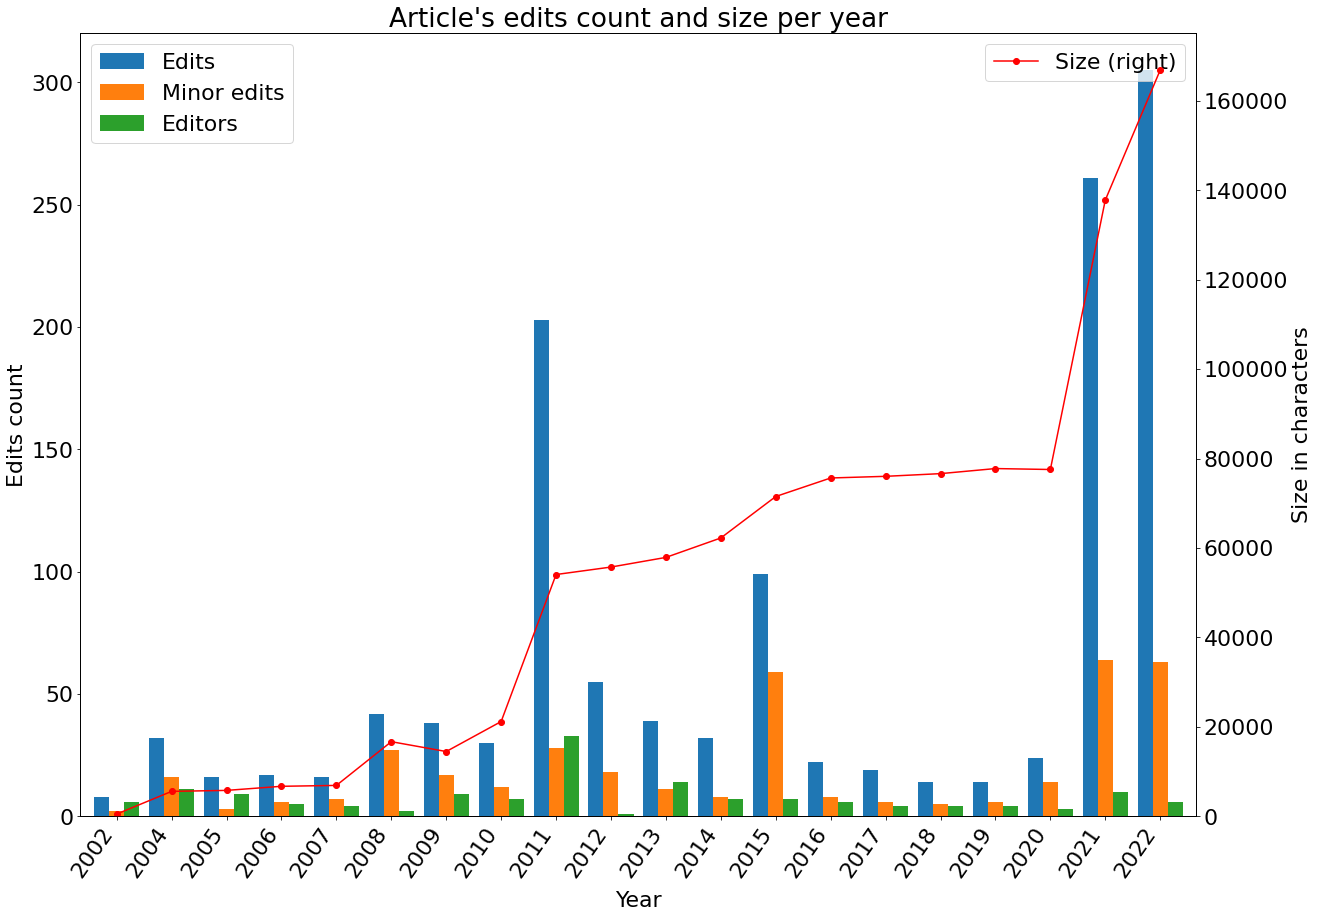

In [338]:
plot_edits_size(edit_sum_year2, save=True)

### 2. Views count

In [8]:
# days df
df_views_count_all
# months df
df_views_count_month

df_views_count_all.resample('M').mean()

,Embodied cognition
Date,
2015-07-31,261.000000
2015-08-31,252.935484
2015-09-30,336.000000
2015-10-31,368.806452
2015-11-30,378.166667
...,...
2022-01-31,412.838710
2022-02-28,456.821429
2022-03-31,416.709677


In [9]:
# select the 15 months period previous and during project
views_before_project = df_views_count_all['2019-12-01':'2021-02-01'].resample('M').mean()
views_during_project = df_views_count_all['2021-03-01':'2022-05-01'].resample('M').mean()


In [10]:
views_before_project['Time period'] = 'Before'
views_during_project['Time period'] = 'During'
# join both dataframes in one for visualizations
joined_df = views_before_project.append(views_during_project)
joined_df.reset_index(inplace = True)
joined_df[joined_df['Time period'] == 'Before'].describe()

,Embodied cognition
count,15.000000
mean,339.934203
std,31.029994
min,291.741935
25%,327.233333
50%,335.322581
75%,367.177419
max,384.133333


In [11]:
joined_df[joined_df['Time period'] == 'During'].describe()

,Embodied cognition
count,15.000000
mean,390.382074
std,83.574523
min,291.870968
25%,347.354839
50%,376.800000
75%,414.774194
max,636.633333


In [12]:
# calculate the increase in page views
(joined_df[joined_df['Time period'] == 'During']['Embodied cognition'].mean() / 
joined_df[joined_df['Time period'] == 'Before']['Embodied cognition'].mean() - 1) * 100

14.840480830377146

In [13]:
desc = joined_df.groupby('Time period').describe()
#pctc = desc.pct_change().dropna().index()

pctc = desc.pct_change().dropna().rename(index={'During': 'Change in %'})
print(desc.append(pctc))

dfi.export(desc.append(pctc), 'Images/before_after_views_change.png')

            Embodied cognition                                                 \
                         count        mean        std         min         25%   
Time period                                                                     
Before                    15.0  339.934203  31.029994  291.741935  327.233333   
During                    15.0  390.382074  83.574523  291.870968  347.354839   
Change in %                0.0    0.148405   1.693346    0.000442    0.061490   

                                                 
                    50%         75%         max  
Time period                                      
Before       335.322581  367.177419  384.133333  
During       376.800000  414.774194  636.633333  
Change in %    0.123694    0.129629    0.657324  


On the top, we have the daily page views distribution for both: a 15 months period before beginning of the project ("Before") and a 15 months period after beginning of the project ("During").
On the bottom, we have the estimated central tendency for daily page views (indicated by the position of scatter plot points) and some indication of the uncertainty around that estimate (indicated  by the vertical error bars).

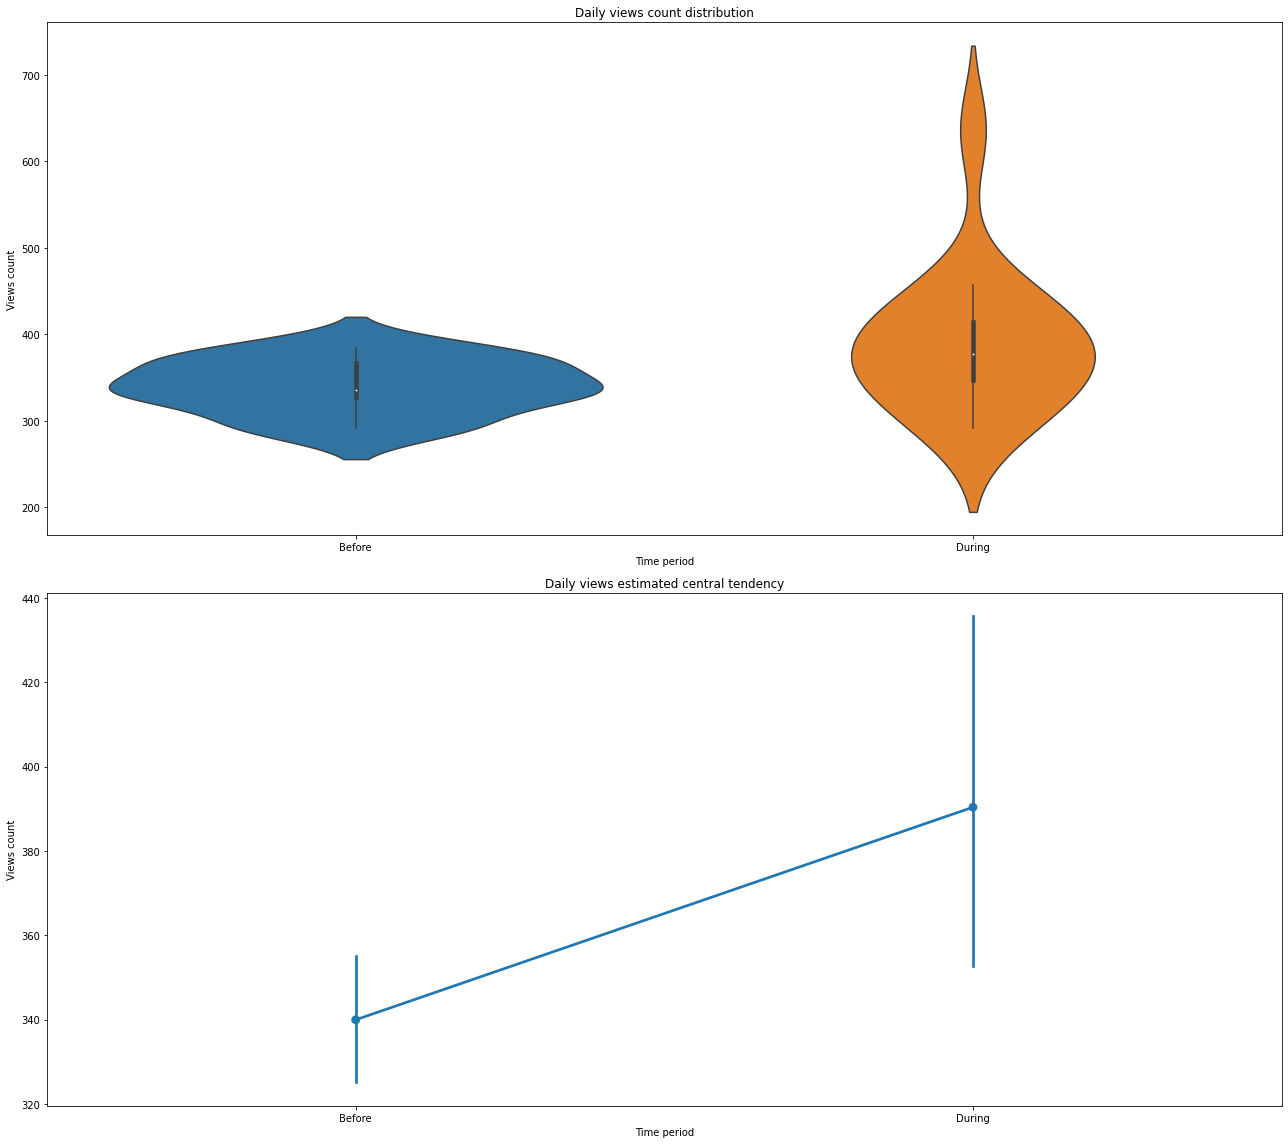

In [10]:
fig, ax = plt.subplots(2,1, figsize=(18,16))
sns.violinplot(x='Time period', y='Embodied cognition',data=joined_df, ax=ax[0])
ax[0].set_title("Daily views count distribution")
ax[0].set_ylabel('Views count')
sns.pointplot(x='Time period', y='Embodied cognition',data=joined_df, ax=ax[1])
ax[1].set_title("Daily views estimated central tendency")
ax[1].set_ylabel("Views count")
fig.tight_layout()
plt.savefig("Images/daily_views_avg.eps", format='eps', dpi=1200)
plt.show()

The total monthly page views over a 30 months period. The red dashed vertical line indicates the beginning of the project at March 2021.

In [11]:
labels = ['Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020','Jan 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'May 2021', 'Jun 2021', 'Jul 2021', 'Aug 2021', 'Sep 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021', 'Jan 2022', 'Feb 2022', 'Mar 2022', 'Apr 2022', 'May 2022']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


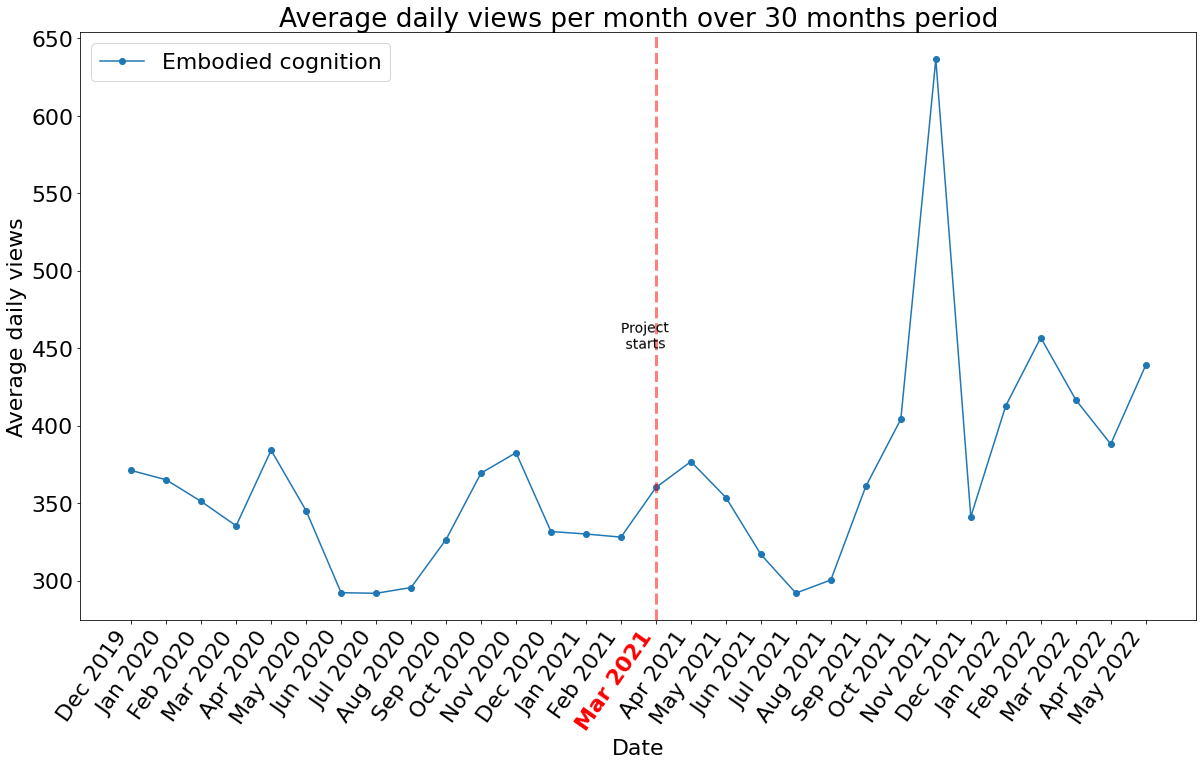

In [80]:
fig, ax = plt.subplots(figsize=(20,12))
joined_df[['Embodied cognition']].plot(ax=ax, marker='o')
plt.xticks(range(0,len(joined_df[['Embodied cognition']].index)),joined_df.Date)
plt.gcf().autofmt_xdate(rotation=55)
ax.set_xlabel("Date")
ax.set_ylabel("Average daily views")
ax.set_title("Average daily views per month over 30 months period")
ax.set_xticklabels(labels)
ax.get_xticklabels()[15].set(weight='heavy', color='red')
ax.axvline([15], alpha=0.5, color='red', linestyle='--', linewidth=3)
ax.text(14,450,'Project \n starts',rotation=1, size=14)
plt.savefig("Images/monthly_views_30_months.eps", format='eps', dpi=1200)
plt.show()

### Quality scale

In [2]:
# import quality datasets
psy_quality = pd.read_csv('Data/psych_assessment.csv', delimiter=";", header=0, index_col=False).fillna(0)
phil_quality = pd.read_csv('Data/phil_assessment.csv', delimiter=";", header=0, index_col=False).fillna(0)

In [3]:
# psychology percentage
psy_quality['% by Total scales'] = (psy_quality['Total'] / psy_quality['Total'].sum()) * 100
psy_quality['% by Mid importance scale'] = (psy_quality['Mid'] / psy_quality['Mid'].sum()) * 100
psy_quality['% cumulative Mid'] = 100*(psy_quality.Mid.cumsum() / psy_quality.Mid.sum())
psy_quality['% cumulative Total'] = 100*(psy_quality.Total.cumsum() / psy_quality.Total.sum())

phil_quality['% by Total scales'] = (phil_quality['Total'] / phil_quality['Total'].sum()) * 100
phil_quality['% by Low importance scale'] = (phil_quality['Low'] / phil_quality['Low'].sum()) * 100
phil_quality['% cumulative Low'] = 100*(phil_quality.Mid.cumsum() / phil_quality.Mid.sum())
phil_quality['% cumulative Total'] = 100*(phil_quality.Total.cumsum() / phil_quality.Total.sum())
phil_quality

,Quality,Top,High,Mid,Low,NA,???,Total,% by Total scales,% by Low importance scale,% cumulative Low,% cumulative Total
0,FA,0.0,8.0,17.0,17.0,0.0,0.0,42,0.177906,0.167587,0.565160,0.177906
1,FL,0.0,0.0,0.0,5.0,0.0,0.0,5,0.021179,0.049290,0.565160,0.199085
2,GA,6.0,31.0,53.0,90.0,0.0,2.0,182,0.770925,0.887224,2.327128,0.970010
3,B,40.0,193.0,313.0,506.0,0.0,65.0,1117,4.731447,4.988170,12.732713,5.701457
4,C,27.0,354.0,684.0,1437.0,0.0,343.0,2845,12.051000,14.166009,35.472074,17.752457
5,Start,20.0,366.0,1248.0,3868.0,2.0,1582.0,7086,30.015249,38.130915,76.961436,47.767706
6,Stub,0.0,74.0,599.0,4088.0,0.0,1188.0,5949,25.199085,40.299685,96.875000,72.966791
7,List,1.0,38.0,87.0,122.0,0.0,31.0,279,1.181803,1.202681,99.767287,74.148594
8,Category,0.0,0.0,6.0,2.0,4159.0,0.0,4167,17.650796,0.019716,99.966755,91.799390
9,Disambig,0.0,0.0,0.0,0.0,69.0,0.0,69,0.292274,0.000000,99.966755,92.091664


In [159]:
dfi.export(phil_quality, 'Images/phil_quality_percent_table.png')
dfi.export(psy_quality, 'Images/psy_quality_percent_table.png')

In [148]:
psy_quality.iloc[:8, [0,9]]

,Quality,% by Mid importance scale
0,FA,0.211864
1,FL,0.042373
2,GA,1.059322
3,B,11.144068
4,C,43.008475
5,Start,37.203390
6,Stub,5.423729
7,List,1.906780


In [149]:
phil_quality.iloc[:8, [0,9]]

,Quality,% by Mid importance scale
0,FA,0.565160
1,FL,0.000000
2,GA,1.761968
3,B,10.405585
4,C,22.739362
5,Start,41.489362
6,Stub,19.913564
7,List,2.892287


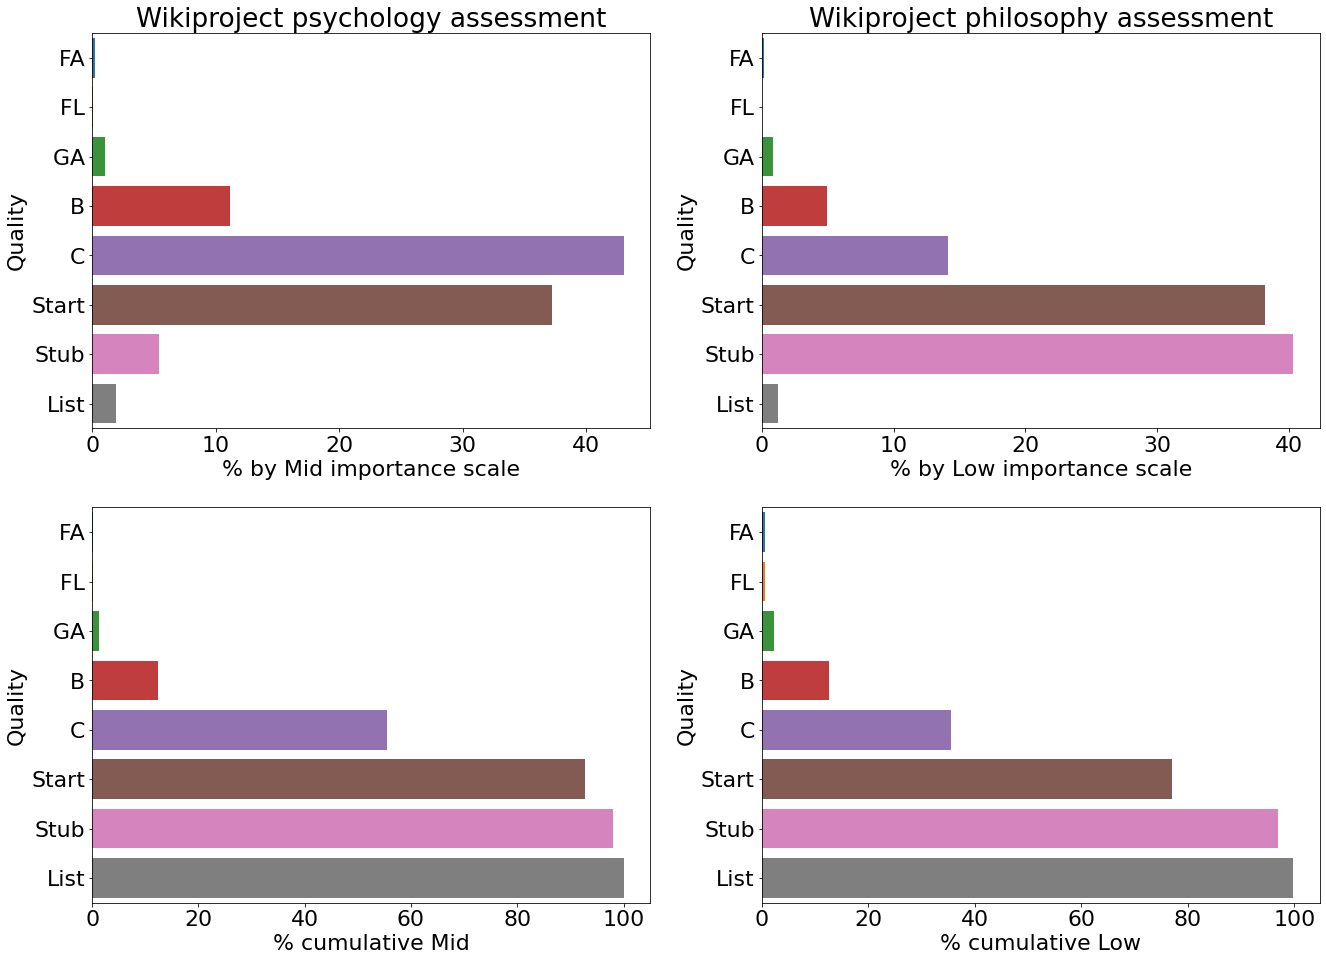

In [165]:
fig, ax = plt.subplots(2,2, figsize=(22,16))
sns.barplot(y='Quality', x='% by Mid importance scale', data=psy_quality.iloc[:8, [0,9]], ax=ax[0,0])
ax[0,0].set_title('Wikiproject psychology assessment')
sns.barplot(y='Quality', x='% by Low importance scale', data=phil_quality.iloc[:8, [0,9]], ax=ax[0,1])
ax[0,1].set_title('Wikiproject philosophy assessment')

sns.barplot(y='Quality', x='% cumulative Mid', data=psy_quality.iloc[:8, [0,10]], ax=ax[1,0])
ax[0,0].set_title('Wikiproject psychology assessment')
sns.barplot(y='Quality', x='% cumulative Low', data=phil_quality.iloc[:8, [0,10]], ax=ax[1,1])
ax[0,1].set_title('Wikiproject philosophy assessment')

plt.savefig("Images/wiki_assessment_scale.eps", format='eps', dpi=1200)
plt.show()

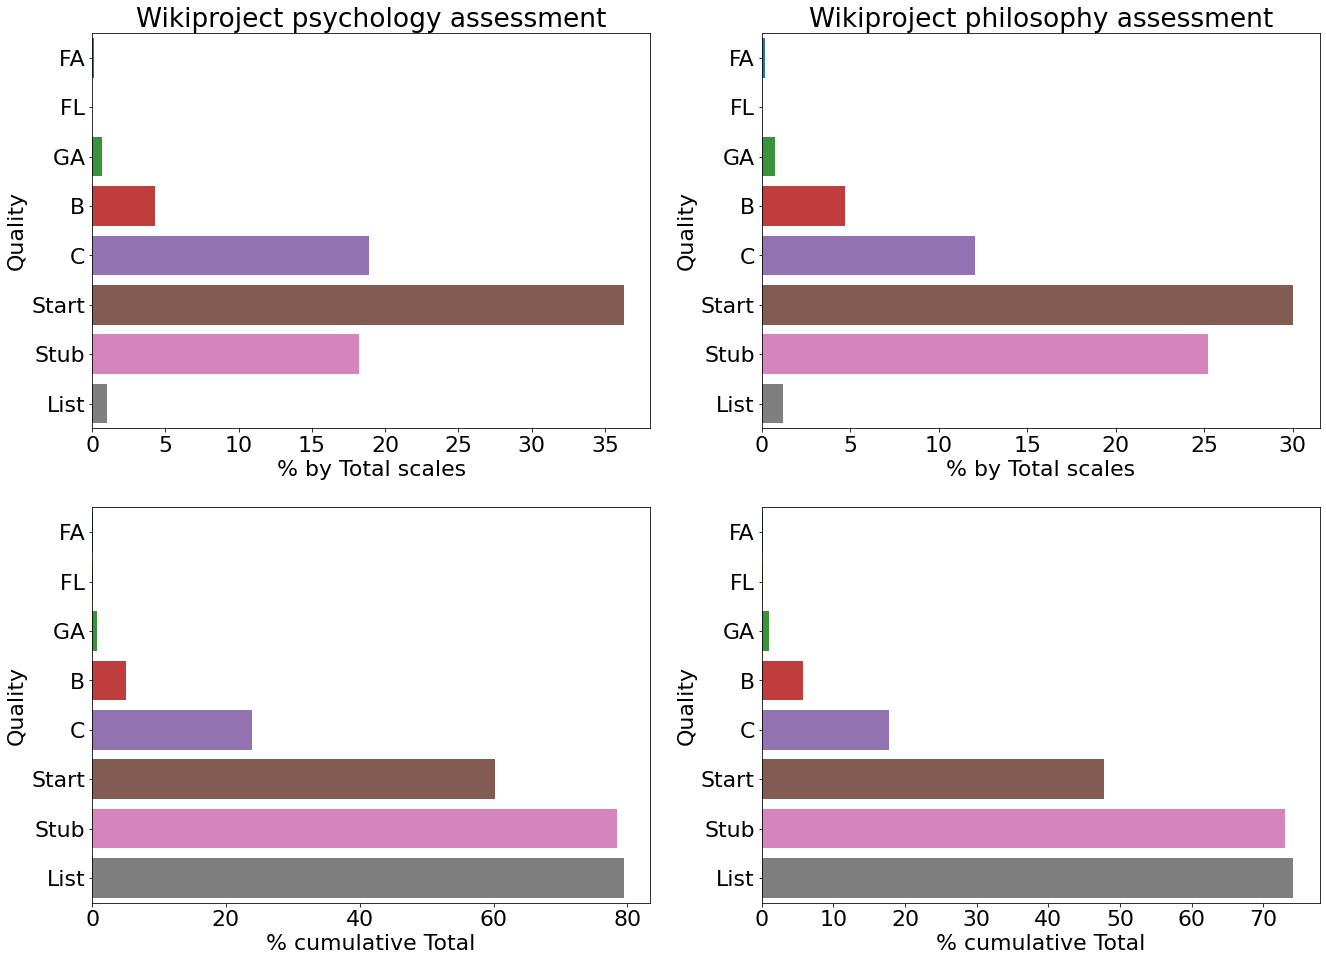

In [166]:
fig, ax = plt.subplots(2,2, figsize=(22,16))
sns.barplot(y='Quality', x='% by Total scales', data=psy_quality.iloc[:8, [0,8]], ax=ax[0,0])
ax[0,0].set_title('Wikiproject psychology assessment')
sns.barplot(y='Quality', x='% by Total scales', data=phil_quality.iloc[:8, [0,8]], ax=ax[0,1])
ax[0,1].set_title('Wikiproject philosophy assessment')

sns.barplot(y='Quality', x='% cumulative Total', data=psy_quality.iloc[:8, [0,11]], ax=ax[1,0])
ax[0,0].set_title('Wikiproject psychology assessment')
sns.barplot(y='Quality', x='% cumulative Total', data=phil_quality.iloc[:8, [0,11]], ax=ax[1,1])
ax[0,1].set_title('Wikiproject philosophy assessment')

plt.savefig("Images/wiki_assessment_total.eps", format='eps', dpi=1200)
plt.show()